In [64]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

GBIF.org (04 November 2024) GBIF Occurrence Download  https://doi.org/10.15468/dl.s8gc9c

(4)  A species richness map is a spatial representation that shows the number of different 
species (i.e., species richness) present in specific geographic areas by counting the 
unique species observed within that area. It highlights the distribution of biodiversity 
across a landscape by depicting where higher or lower concentrations of species occur. 

Your task is to create a bird species richness map for Kenya. Your map should provide a 
clear visual representation of the geographic distribution of bird diversity and offer 
insights into potential biodiversity hotspots or areas of lower species richness. After 
doing so, analyze how bird species richness varies across the country. 

In [65]:
# Load the dataset
df = pd.read_csv('/Users/mina/Desktop/MADS/3rd_semester/WorkshopI/geospatial-data-analysis/data/GBIT_annotated_archive/DARWIN_CORE_ARCHIVE/0020723-241024112534372/occurrence.txt', delimiter='\t')
df.shape

/var/folders/l0/k7f2rhdj5xg3__zf2_xlw76c0000gn/T/ipykernel_86482/2616293513.py:2: DtypeWarning: Columns (170) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/mina/Desktop/MADS/3rd_semester/WorkshopI/geospatial-data-analysis/data/GBIT_annotated_archive/DARWIN_CORE_ARCHIVE/0020723-241024112534372/occurrence.txt', delimiter='\t')


(89632, 223)

In [66]:
df.columns

Index(['gbifID', 'accessRights', 'bibliographicCitation', 'language',
       'license', 'modified', 'publisher', 'references', 'rightsHolder',
       'type',
       ...
       'publishedByGbifRegion', 'level0Gid', 'level0Name', 'level1Gid',
       'level1Name', 'level2Gid', 'level2Name', 'level3Gid', 'level3Name',
       'iucnRedListCategory'],
      dtype='object', length=223)


`scientificName`: This field will allow us to count unique species (like Accipiter badius) in each geographic region to determine species richness.

`vernacularName` (common name), which can be helpful for easier interpretation in visualizations.

`decimalLatitude` and `decimalLongitude`: These fields provide precise coordinates, enabling us to map occurrences spatially across Kenya.
    
`eventDate`: Useful if you want to analyze temporal patterns in species richness.

`individualCount`: Not directly required for species richness but may add value if you're also interested in abundance patterns.

`iucnRedListCategory`: Useful for conservation insights, indicating the threat level for observed species. This could help you identify areas with high richness of threatened species.

In [67]:
# Filter records for Kenya and remove any rows with missing lat/lon
df_kenya = df[(df['countryCode'] == 'KE') & df['decimalLatitude'].notna() & df['decimalLongitude'].notna()]
df_kenya.shape

(89632, 223)

In [68]:
print(df_kenya['scientificName'].value_counts())
print("#"*100)
print(df_kenya['vernacularName'].value_counts())
print("#"*100)
print(df_kenya['decimalLatitude'].value_counts())
print("#"*100)
print(df_kenya['decimalLongitude'].value_counts())
print("#"*100)
print(df_kenya['eventDate'].value_counts())
print("#"*100)
print(df_kenya['individualCount'].value_counts())
print("#"*100)
print(df_kenya['iucnRedListCategory'].value_counts())
print("#"*100)

scientificName
Corvus albus Statius Muller, 1776               1605
Pycnonotus barbatus (Desfontaines, 1789)        1601
Bostrychia hagedash (Latham, 1790)              1452
Colius striatus J.F.Gmelin, 1789                1343
Streptopelia capicola (Sundevall, 1857)         1075
                                                ... 
Pterocles quadricinctus Temminck, 1815             1
Ptilostomus afer (Linnaeus, 1766)                  1
Heteromyias albispecularis (Salvadori, 1876)       1
Puffinus bailloni (Bonaparte, 1857)                1
Pycnonotus goiavier (Scopoli, 1786)                1
Name: count, Length: 1256, dtype: int64
####################################################################################################
vernacularName
Common Bulbul                1601
Pied Crow                    1361
Speckled Mousebird           1343
African Pied Wagtail          980
Red-eyed Dove                 965
                             ... 
Southern Black-flycatcher       1
African 

In [69]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_kenya,
    geometry=gpd.points_from_xy(df_kenya['decimalLongitude'], df_kenya['decimalLatitude']),
    crs='EPSG:4326'
)

now we calculate species richness at each unique geographic location (latitude and longitude pair) by counting the number of unique species observed at each location. 

In [71]:
# Group by location and count unique species
species_richness = gdf.groupby(['decimalLatitude', 'decimalLongitude']).agg({'scientificName': 'nunique'}).reset_index()
species_richness.rename(columns={'scientificName': 'species_count'}, inplace=True)

In [ ]:
print(species_richness.head())

   decimalLatitude  decimalLongitude  species_count
0        -4.719087         39.369996              1
1        -4.719030         39.369679              1
2        -4.719009         39.369538              1
3        -4.718704         39.369087              1
4        -4.717096         39.369243              1


In [79]:
print(species_richness['species_count'].value_counts())

species_count
1      50163
2       3278
3        854
4        360
5        181
       ...  
101        1
71         1
35         1
46         1
90         1
Name: count, Length: 87, dtype: int64


In [73]:
# Convert to GeoDataFrame
gdf_richness = gpd.GeoDataFrame(
    species_richness,
    geometry=gpd.points_from_xy(species_richness['decimalLongitude'], species_richness['decimalLatitude']),
    crs='EPSG:4326'
)

In [74]:
print(gdf_richness.head())

   decimalLatitude  decimalLongitude  species_count                   geometry
0        -4.719087         39.369996              1     POINT (39.37 -4.71909)
1        -4.719030         39.369679              1  POINT (39.36968 -4.71903)
2        -4.719009         39.369538              1  POINT (39.36954 -4.71901)
3        -4.718704         39.369087              1   POINT (39.36909 -4.7187)
4        -4.717096         39.369243              1   POINT (39.36924 -4.7171)


/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


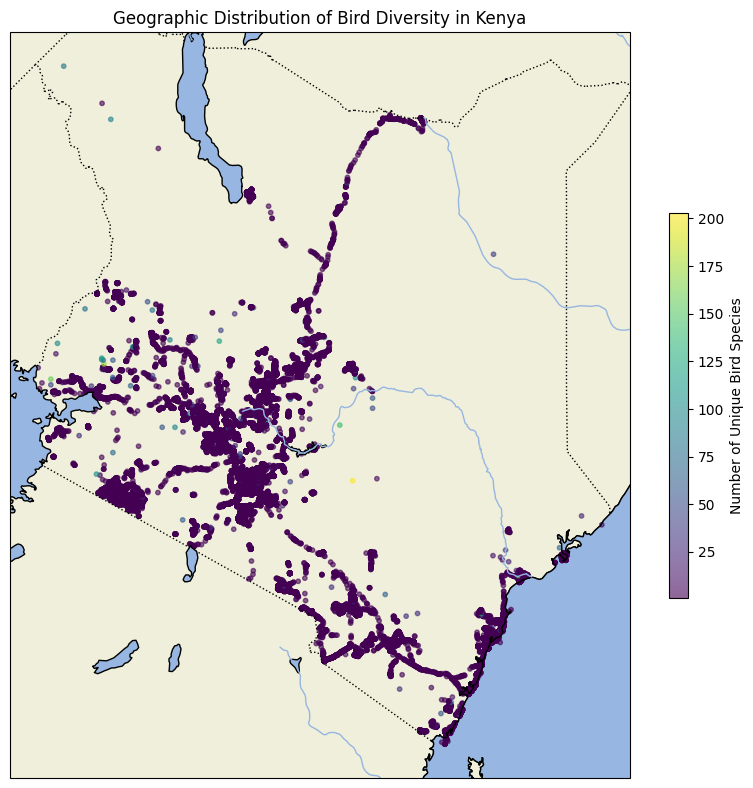

In [ ]:
# Create a plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)


# Plot species richness data as points with color intensity based on richness
scatter = ax.scatter(
    gdf_richness['decimalLongitude'],
    gdf_richness['decimalLatitude'],
    c=gdf_richness['species_count'],
    cmap='viridis',
    s=10,
    transform=ccrs.PlateCarree(),
    alpha=0.6
)


# Add a colorbar to indicate species richness levels
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)
cbar.set_label('Number of Unique Bird Species')

# Set title and axis labels
ax.set_title('Geographic Distribution of Bird Diversity in Kenya')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


In [80]:
# Define a list of threatened categories
threatened_categories = ['Vulnerable', 'Endangered', 'Critically Endangered']

# Filter the GeoDataFrame for threatened species
gdf_threatened = gdf[gdf['iucnRedListCategory'].isin(threatened_categories)]

# Calculate threatened species richness by location (latitude and longitude)
threatened_species_richness = gdf_threatened.groupby(['decimalLatitude', 'decimalLongitude']).agg({'scientificName': 'nunique'}).reset_index()
threatened_species_richness.rename(columns={'scientificName': 'threatened_species_count'}, inplace=True)

# Convert to GeoDataFrame
gdf_threatened_richness = gpd.GeoDataFrame(
    threatened_species_richness,
    geometry=gpd.points_from_xy(threatened_species_richness['decimalLongitude'], threatened_species_richness['decimalLatitude']),
    crs='EPSG:4326'
)


/var/folders/l0/k7f2rhdj5xg3__zf2_xlw76c0000gn/T/ipykernel_86482/2921560081.py:10: DtypeWarning: Columns (170) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')
/usr/local/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


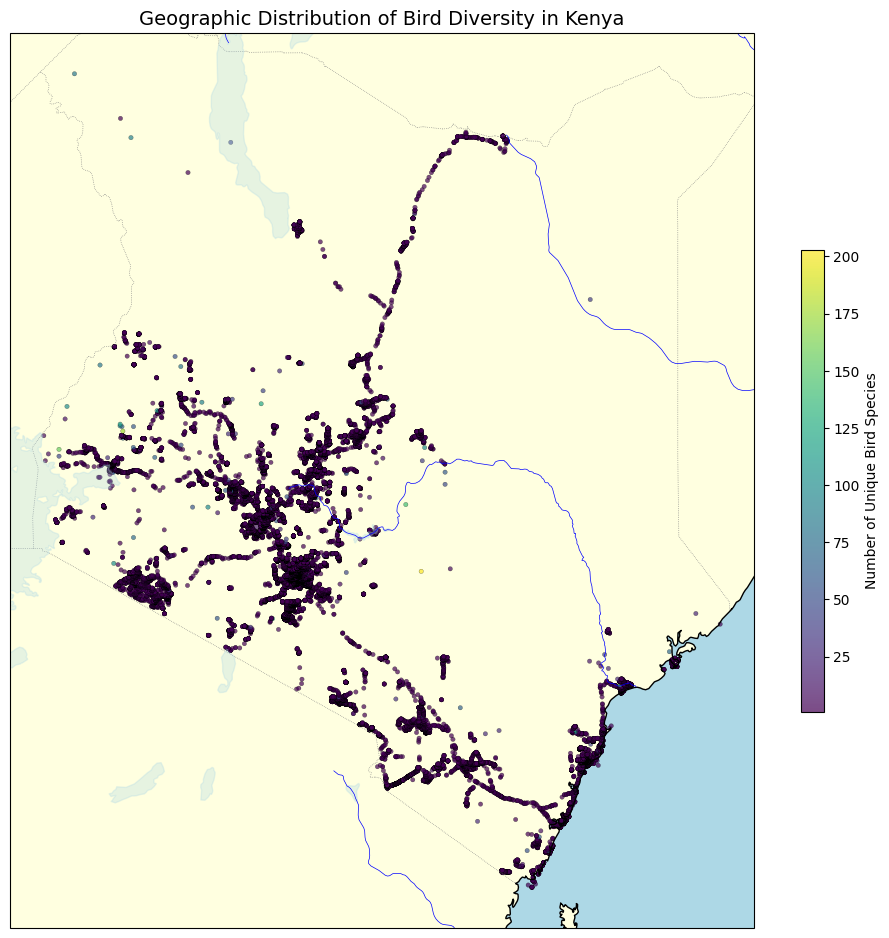

In [82]:
# Required Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the dataset
file_path = '/Users/mina/Desktop/MADS/3rd_semester/WorkshopI/geospatial-data-analysis/data/GBIT_annotated_archive/DARWIN_CORE_ARCHIVE/0020723-241024112534372/occurrence.txt'
df = pd.read_csv(file_path, delimiter='\t')

# Filter for Kenya and ensure records have coordinates
df_kenya = df[(df['countryCode'] == 'KE') & df['decimalLatitude'].notna() & df['decimalLongitude'].notna()]

# Convert to GeoDataFrame with geometry points
gdf = gpd.GeoDataFrame(
    df_kenya,
    geometry=gpd.points_from_xy(df_kenya['decimalLongitude'], df_kenya['decimalLatitude']),
    crs='EPSG:4326'
)

# Calculate species richness (number of unique species at each location)
species_richness = gdf.groupby(['decimalLatitude', 'decimalLongitude']).agg({'scientificName': 'nunique'}).reset_index()
species_richness.rename(columns={'scientificName': 'species_count'}, inplace=True)

# Convert to GeoDataFrame for richness data
gdf_richness = gpd.GeoDataFrame(
    species_richness,
    geometry=gpd.points_from_xy(species_richness['decimalLongitude'], species_richness['decimalLatitude']),
    crs='EPSG:4326'
)

# Plot the geographic distribution of bird diversity in Kenya
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Add more geographic features using cartopy's cfeature library
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray', linewidth=0.5)  # National borders
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  # Coastline
ax.add_feature(cfeature.LAKES, alpha=0.3, color='lightblue')  # Lakes
ax.add_feature(cfeature.RIVERS, linewidth=0.5, color='blue')  # Rivers
ax.add_feature(cfeature.LAND, facecolor='lightyellow')  # Land color
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Ocean color

# Optional: Add state/province boundaries if relevant to your region
# For Kenya, there might not be internal states in Cartopy's default dataset
# but if you have a shapefile, you can add it as an additional layer

# Plot species richness data as points with color intensity based on richness
scatter = ax.scatter(
    gdf_richness['decimalLongitude'],
    gdf_richness['decimalLatitude'],
    c=gdf_richness['species_count'],
    cmap='viridis',
    s=10,
    transform=ccrs.PlateCarree(),
    alpha=0.7,
    edgecolor='black',  # Adding a thin border around points for visibility
    linewidth=0.2
)

# Add a colorbar to indicate species richness levels
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)
cbar.set_label('Number of Unique Bird Species')

# Set title and labels
ax.set_title('Geographic Distribution of Bird Diversity in Kenya', fontsize=14)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Show the plot
plt.show()


In [86]:
# Separate locations with species richness of 1 and more than 1
single_species = gdf_richness[gdf_richness['species_count'] == 1]
multiple_species = gdf_richness[gdf_richness['species_count'] > 1]


In [87]:
single_species

,decimalLatitude,decimalLongitude,species_count,geometry
0,-4.719087,39.369996,1,POINT (39.37 -4.71909)
1,-4.719030,39.369679,1,POINT (39.36968 -4.71903)
2,-4.719009,39.369538,1,POINT (39.36954 -4.71901)
3,-4.718704,39.369087,1,POINT (39.36909 -4.7187)
4,-4.717096,39.369243,1,POINT (39.36924 -4.7171)
...,...,...,...,...
55362,3.543876,38.646130,1,POINT (38.64613 3.54388)
55363,3.545097,38.646096,1,POINT (38.6461 3.5451)
55364,3.549455,38.645766,1,POINT (38.64577 3.54946)
55365,3.561657,38.645112,1,POINT (38.64511 3.56166)


In [88]:
multiple_species

,decimalLatitude,decimalLongitude,species_count,geometry
33,-4.563417,39.374207,3,POINT (39.37421 -4.56342)
94,-4.550763,39.098282,2,POINT (39.09828 -4.55076)
230,-4.483333,39.233333,12,POINT (39.23333 -4.48333)
232,-4.481669,39.482342,3,POINT (39.48234 -4.48167)
236,-4.481554,39.482266,2,POINT (39.48227 -4.48155)
...,...,...,...,...
55325,3.511301,38.618674,4,POINT (38.61867 3.5113)
55338,3.516952,39.050432,2,POINT (39.05043 3.51695)
55352,3.518050,39.050087,2,POINT (39.05009 3.51805)
55355,3.518121,39.050089,2,POINT (39.05009 3.51812)


/usr/local/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


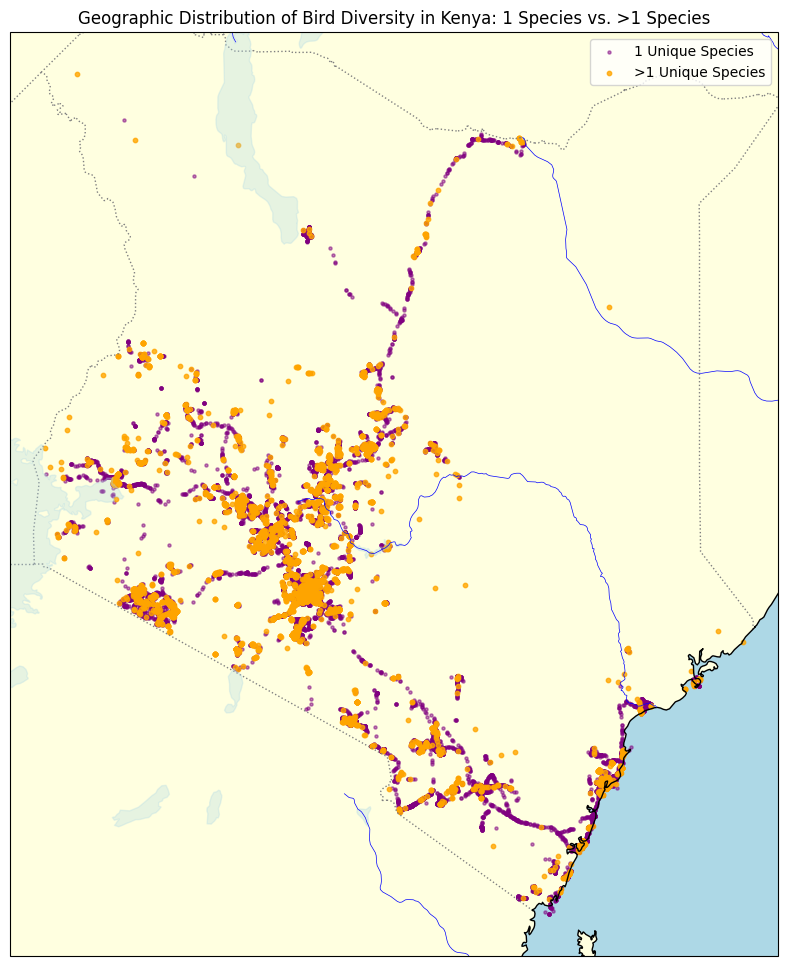

In [90]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create the map
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Add base geographic features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.LAKES, alpha=0.3, color='lightblue')
ax.add_feature(cfeature.RIVERS, linewidth=0.5, color='blue')
ax.add_feature(cfeature.LAND, facecolor='lightyellow')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot locations with only 1 species in one color (e.g., dark purple)
scatter1 = ax.scatter(
    single_species['decimalLongitude'],
    single_species['decimalLatitude'],
    color='purple',
    s=5,  # Make these points smaller due to high number
    transform=ccrs.PlateCarree(),
    alpha=0.5,
    label='1 Unique Species'
)

# Plot locations with more than 1 species in another color (e.g., orange)
scatter2 = ax.scatter(
    multiple_species['decimalLongitude'],
    multiple_species['decimalLatitude'],
    color='orange',
    s=10,  # Larger points to highlight high-diversity locations
    transform=ccrs.PlateCarree(),
    alpha=0.8,
    label='>1 Unique Species'
)

# Add legend to distinguish between the two groups
ax.legend(loc='upper right', fontsize=10)

# Set title and labels
ax.set_title('Geographic Distribution of Bird Diversity in Kenya: 1 Species vs. >1 Species')
plt.show()
